# Example 3: Post-Processing and Visualising Nonlinear Time-History Analysis Results using the "postprocessor" and "plotter" Classes

## Introduction



This Jupyter notebook is designed to postprocess and visualize the results of a **Nonlinear Time History AnalysiLs (NTHA)** conducted on a **Multi-Degree of Freedom (MDOF)** structural sy in Example_2st
Post-processing cloud analysis 

The key objective of this notebook is:

**Result Post-Processing**: Extract and visualize critical response metrics to:
   - Visualise seismic demands such as peak storey drifts (PSD) and peak floor accelerations (PFA) along the building height 
   - Perform and visualise cloud analyses to characterise the engineering demand parameter (i.e., maximum peak storey drift) given intensity measure levels distribution (or EDP=MPSD|IM)
   - Estimate the median seismic intensities and total associated dispersions (i.e., accounting for record-to-record variability and modelling uncertainty) corresponding to user-defined demand-based damage thresholds 
   - Calculate and visualise damage probabilities (i.e., fragility functions) corresponding to distinct structural damage states

The notebook provides a step-by-step guide, covering each phase from MDOF model calibration, setup to input parameter configuration, analysis execution, and detailed results interpretation. Users should have some familiarity with python scripts, structural dynamics and computational modeling to fully benefit from this material.

---

## Prerequisites

---

## Workflow Overview

1. **Import and preprocess the results** from a nonlinear time history analysis, which includes peak response metrics and engineering demand parameters.
2. **Evaluate the performance** of the system by examining the IM-EDP relationship via regression analysis on cloud results.
3. **Visualize the response** of the system in terms of cloud analyses, fragility functions and seismic demands along the height of the building.

By the end of this notebook, users will have a complete, adaptable script for nonlinear dynamic analyses on MDOF structures, supporting a range of investigation scenarios and performance assessments.

Let’s begin by defining initial input parameters and loading the required libraries and setting up the initial parameters for the MDOF model.
ers for the MDOF model.

# Input Parameters

In [3]:
### [REQUIRED INPUT] Define the main directory
main_directory = 'C:/Users/m.nafeh/Desktop/to_github' # Replace this line with the directory you cloned the scripts to

### [REQUIRED INPUT] Building Class from Database
currentBuildingClass = 'EU_LWAL+DNO_H3' # The example building class (DO NOT EDIT UNLESS YOU HAVE MADE CHANGES TO INPUT FILES)

### [REQUIRED INPUT] Intensity measures to use for cloud analyses
IMTs      = ['PGA', 'SA(0.3s)', 'SA(0.6s)', 'SA(1.0s)'] # Intensity measures to process

# Initialize Libraries and Modules

In [5]:
import time
import sys

# Import vulnerability-toolkit libraries
sys.path.insert(1, f'{main_directory}/src')
from postprocessor import *
from plotter import *
from utilities import *

start = time.time()

# Define Directories

In [7]:
# Define the directory of the ground-motion records
gmDir  = f'{main_directory}/example/in/records'            

# Define the directory of the damping model
threshDir = f'{main_directory}/example/in/thresholds'

# Define the main output directory
nlthaOutDir = f'{main_directory}/example/out/nltha'  

# Import Analysis Data

In [9]:
# Import the analysis output from a pickle file using the "import_from_pkl" function from "utilities"
ansys_dict = import_from_pkl(f'{nlthaOutDir}/analysis_{currentBuildingClass}.pkl') # processed from example 2

# Import the structural damage states thresholds
thresholds_info_df = pd.read_csv(f'{threshDir}/structural_damage_thresholds.csv')

# Post-Processing: Cloud and Fragility Analysis

#### The cloud analysis module (do_cloud_analysis) of the "postprocessor" class requires five mandatory arguments and one optional:
1. The intensity measure levels of the ground-motion records (imls)
2. The engineering demand parameters from the analysis (edps)
3. The demand-based damage thresholds (damage_thresholds)
4. The lower edp censoring limit (lower_limit)
5. The upper edp censoring limit (censored_limit)
6. OPTIONAL: The modelling uncertainty (sigma_build2build)

In [12]:
ims = import_from_pkl(f'{gmDir}/ims.pkl')     # Import the intensity measure pickle file containing all IMs (processed from example 1)
edps = ansys_dict['mdof_max_peak_drift_list'] # Import the engineering demand parameters (i.e., mpsd) from the analysis dictionary (processed from example 2)
damage_thresholds    =  thresholds_info_df.iloc[thresholds_info_df[thresholds_info_df.Building_class == currentBuildingClass].index[0],1:5].values.tolist() # Damage thresholds (maximum peak storey drift values)
lower_limit = 0.1*damage_thresholds[0]        # The lower limit to be applied for censoring edp values (below 0.1 the minimum threshold for slight damage is considered a negligible case)
censored_limit = 1.5*damage_thresholds[-1]    # The upper limit to be applied for consoring edp values (above 1.5 the maximum threshold is considered a collapse case) 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


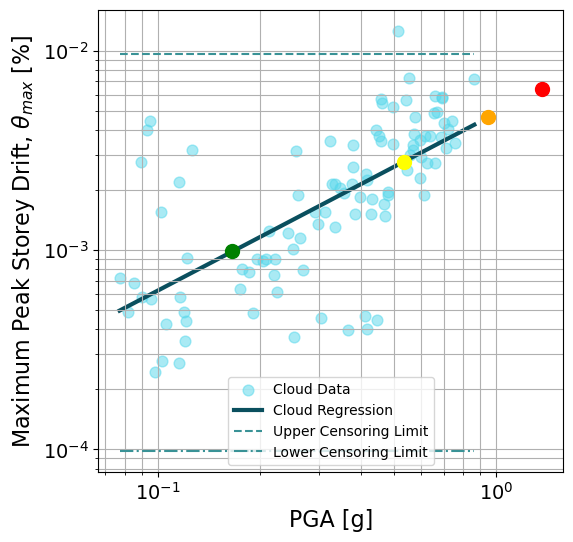

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


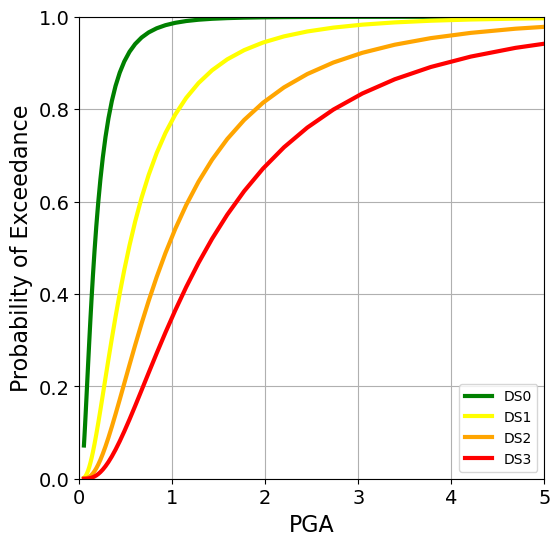

findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


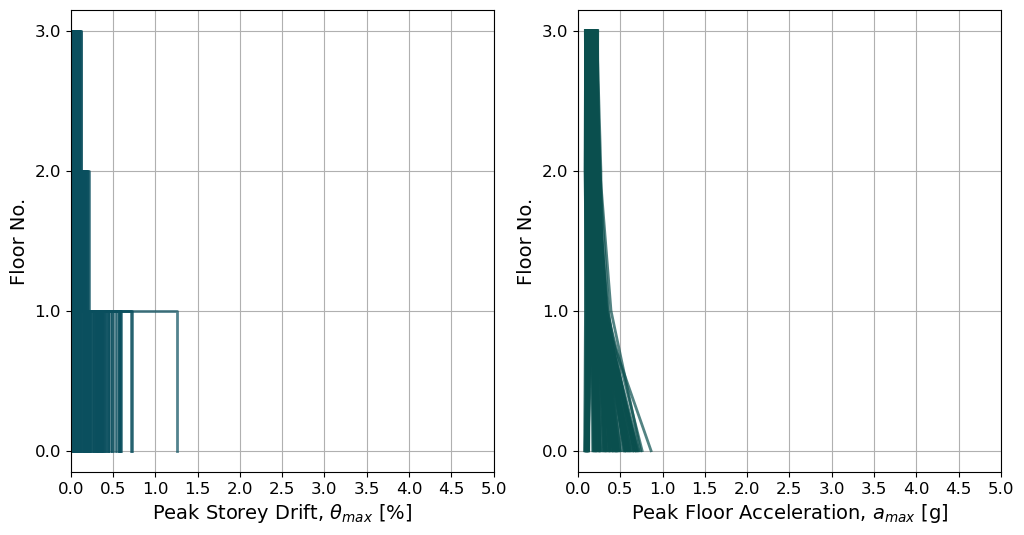

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica'

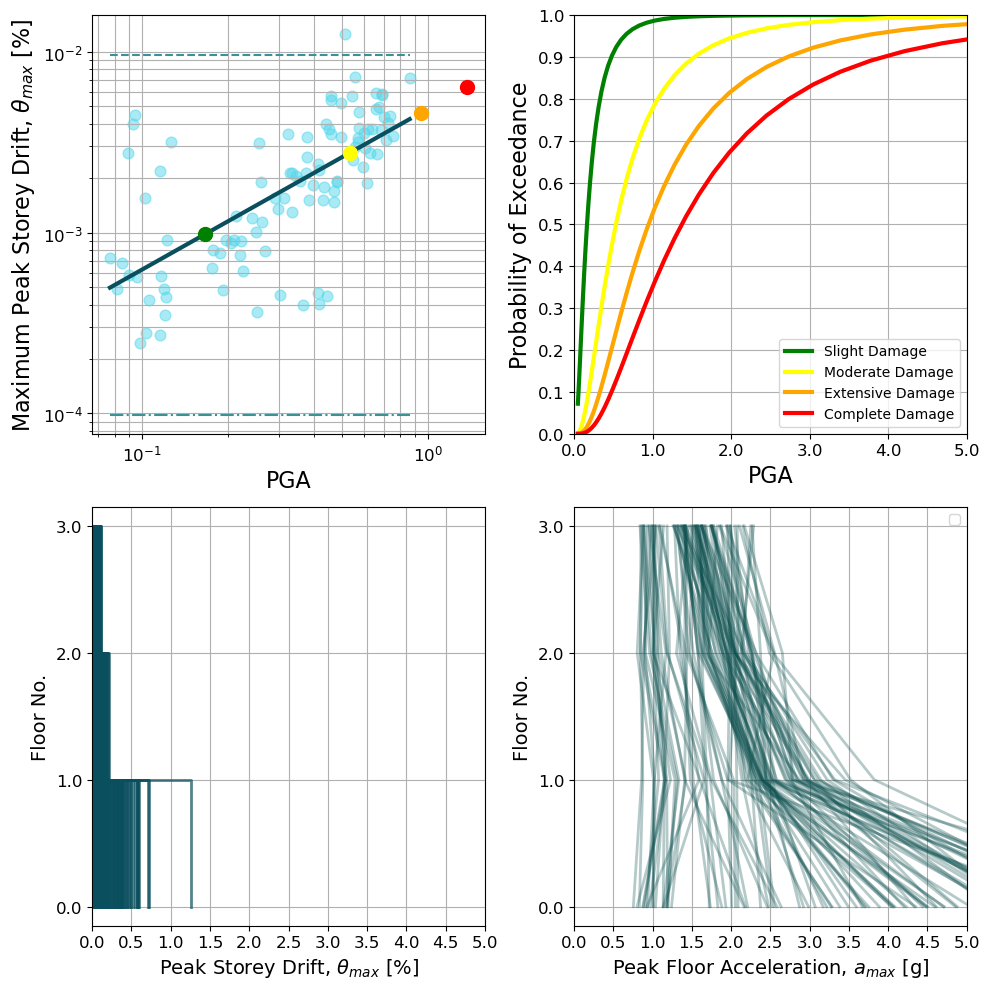

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


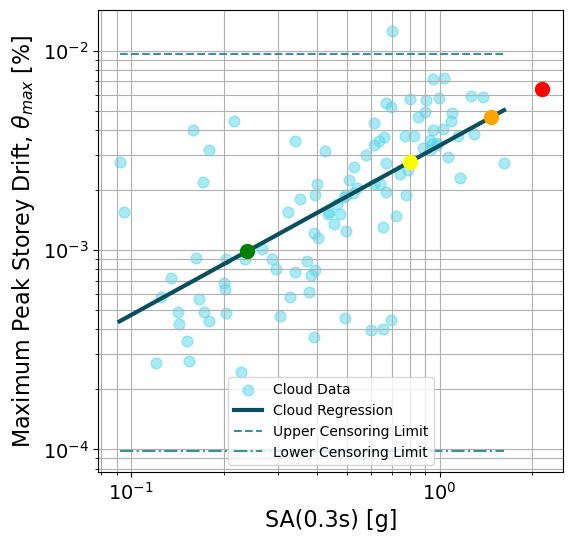

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


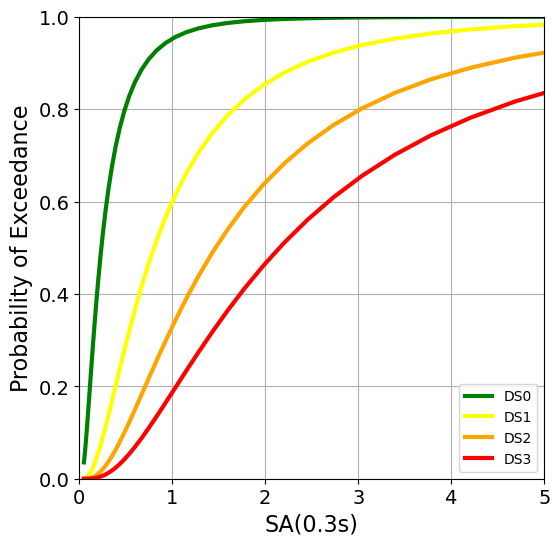

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


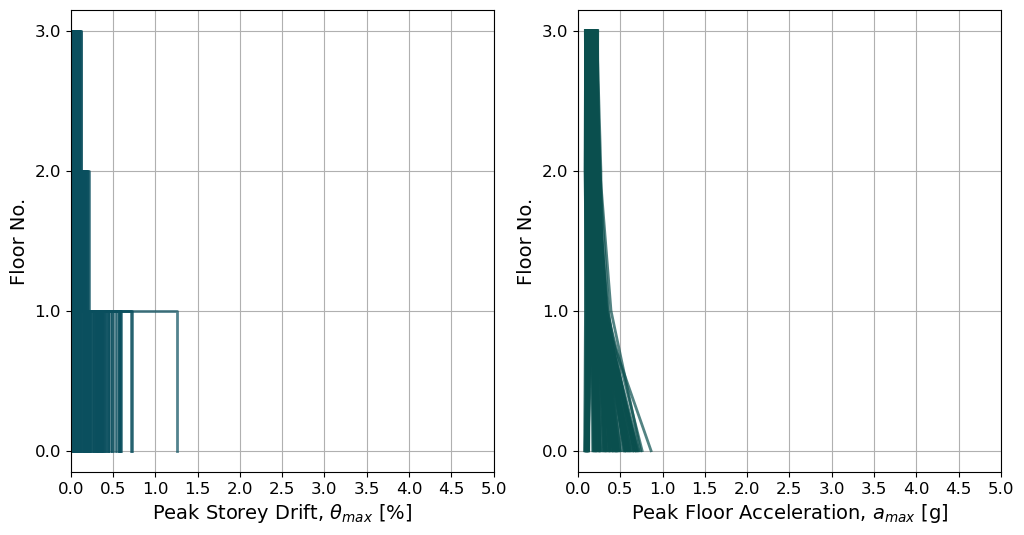

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica'

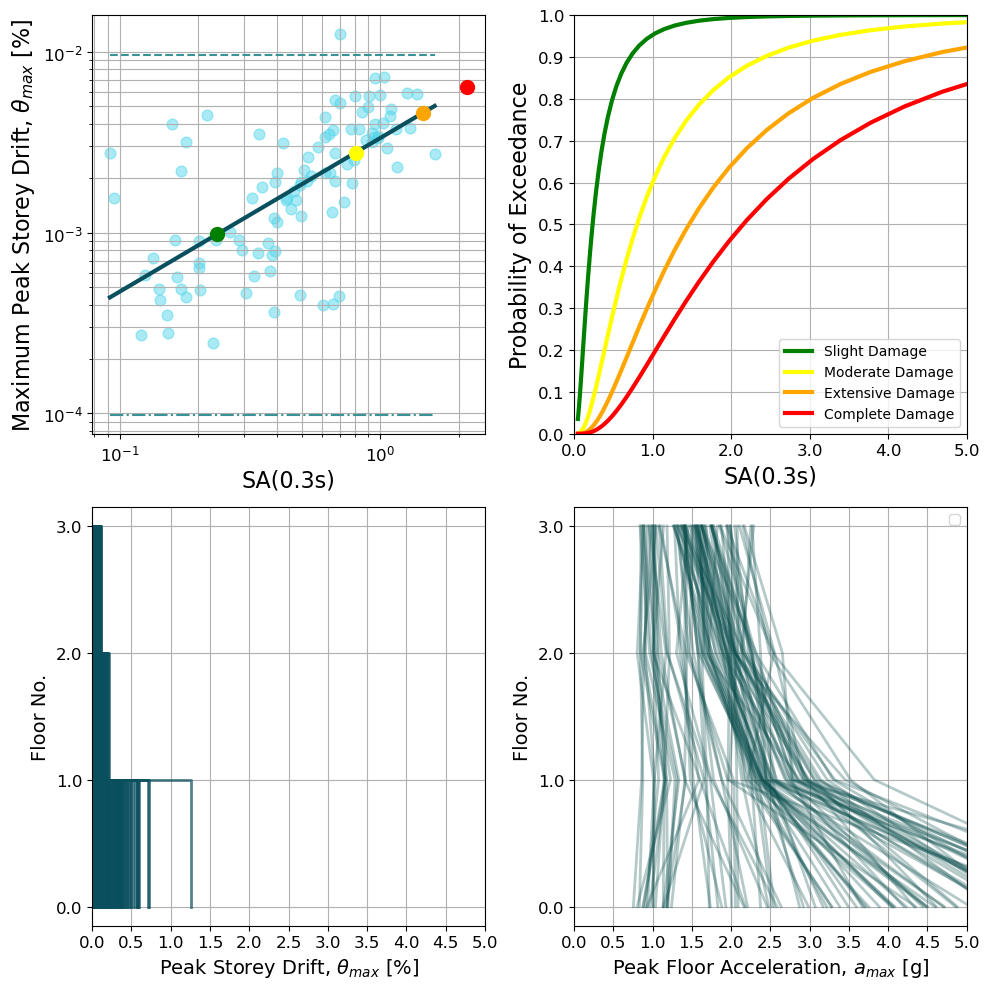

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


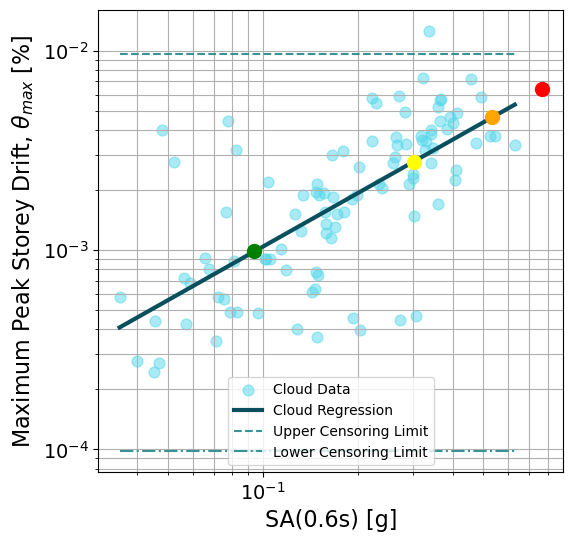

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


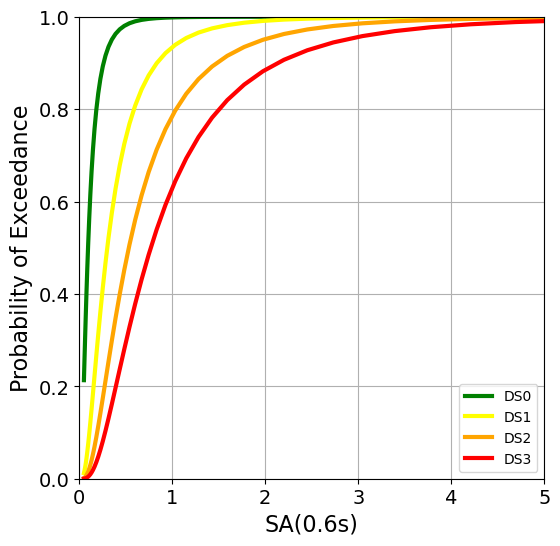

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


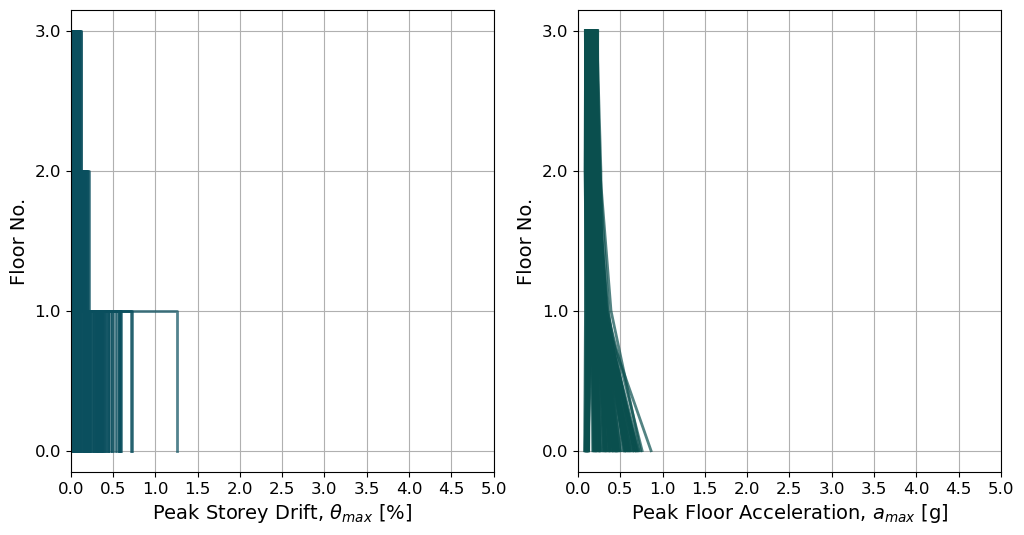

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica'

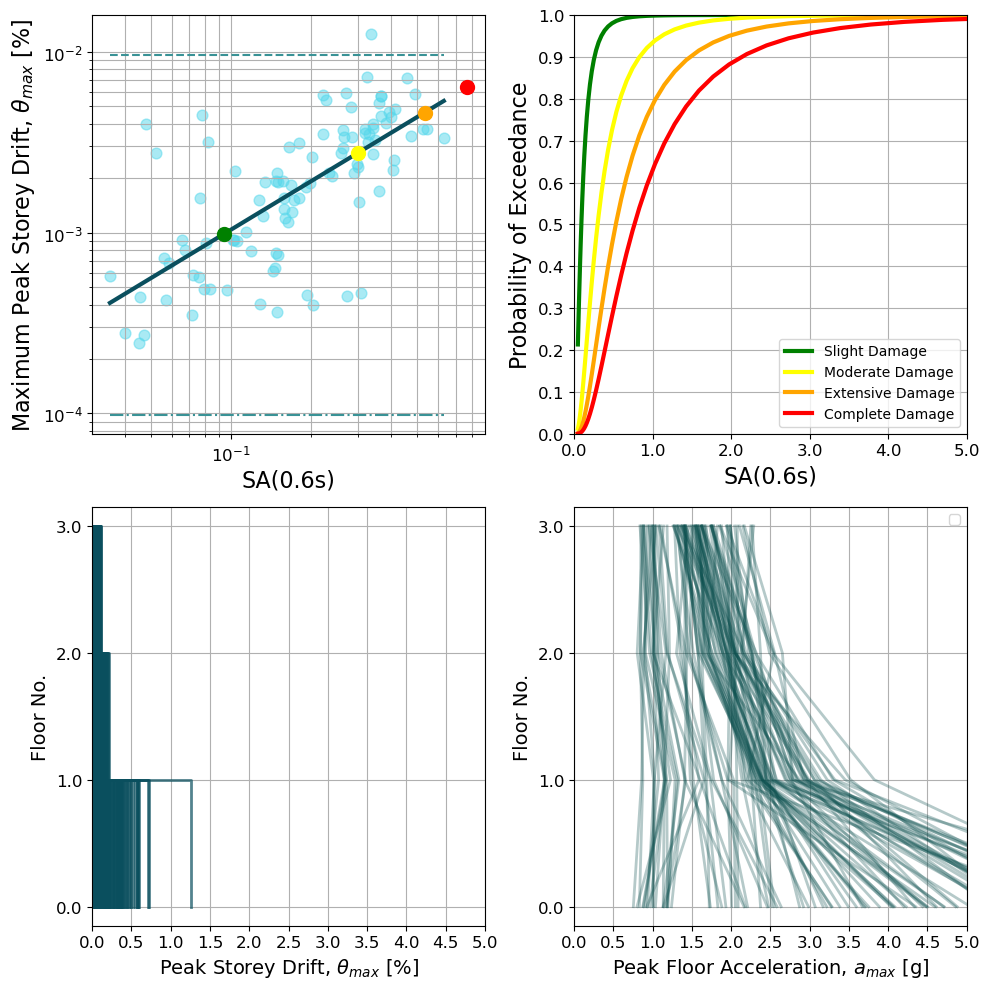

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


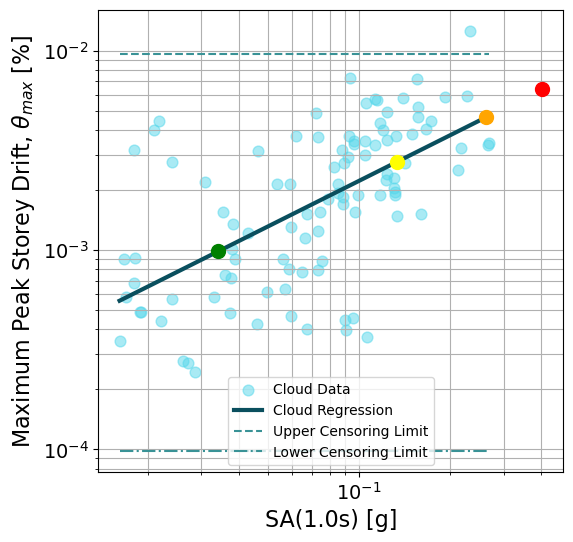

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


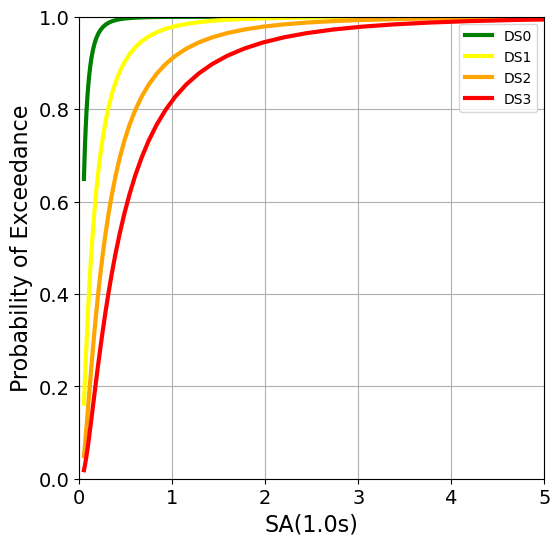

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


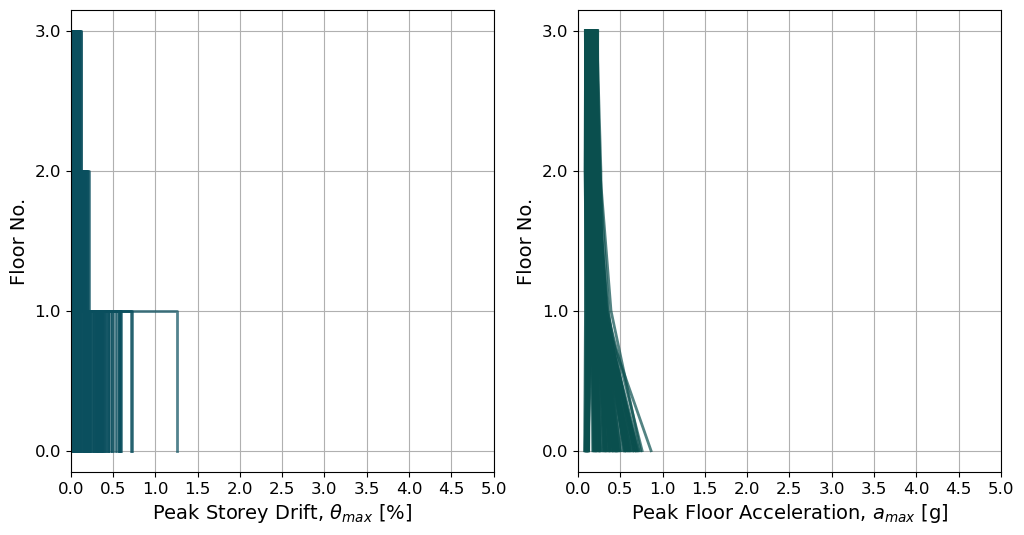

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica'

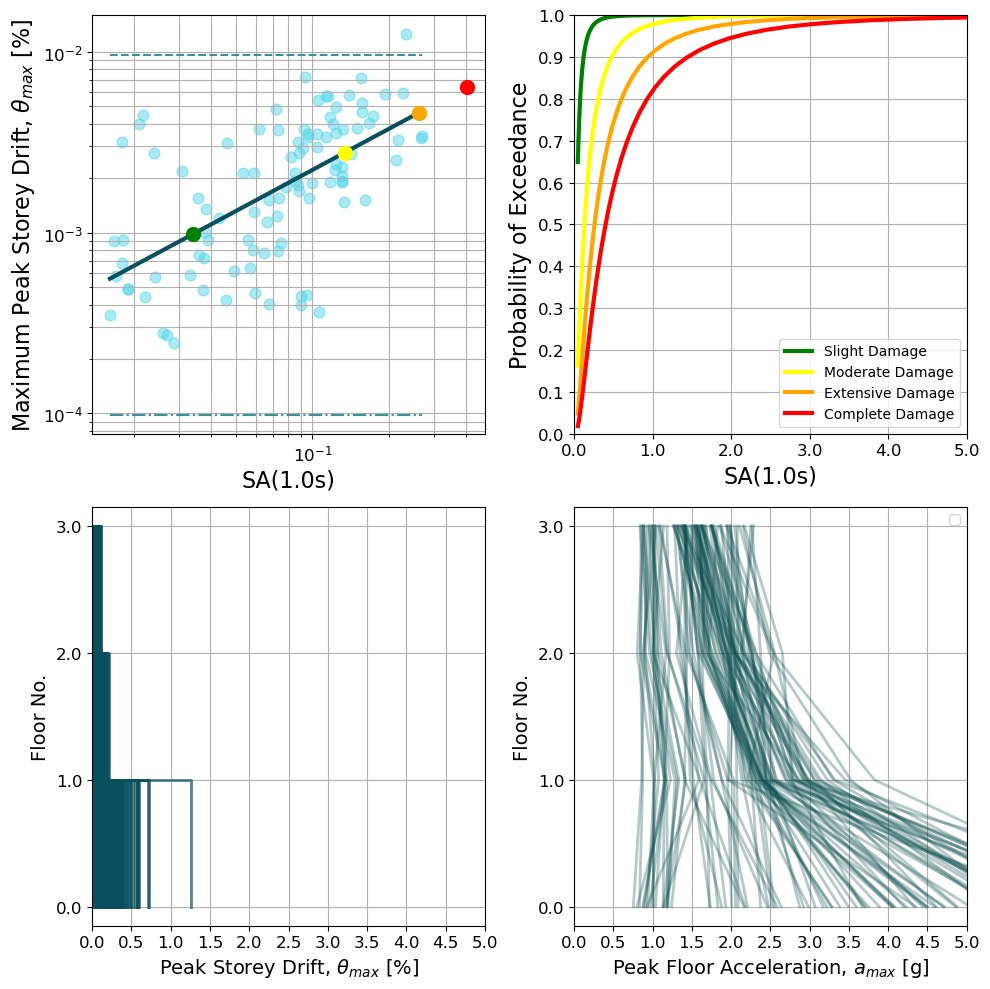

In [13]:
# Loop over the intensity measure types and perform cloud regression to fit 
# the probabilistic seismic demand-capacity model
for _, currentIMT in enumerate(IMTs):
    
    # Import the current intensity measure type
    imls = ims[f'{currentIMT}']                   

    # Initialise the postprocessor and plotter classes
    pp = postprocessor()
    pl = plotter()
    
    # Process cloud analysis results using the "do_cloud_analysis" function called from "postprocessor" 
    # The output will be automatically stored in a dictionary
    cloud_dict = pp.do_cloud_analysis(imls,
                                      edps,
                                      damage_thresholds,
                                      lower_limit,
                                      censored_limit) 
    
    ## Create a figures directory for each building class
    figures_directory = f'{main_directory}/example/out/nltha/figures/{currentBuildingClass}'    
    if not os.path.exists(f'{figures_directory}'):
        os.makedirs(f'{figures_directory}')
    
    ## Visualise the cloud analysis results
    pl.plot_cloud_analysis(cloud_dict, 
                        figures_directory, 
                        plot_label = 'cloud_analysis_{currentIMT}',
                        xlabel = f'{currentIMT} [g]', 
                        ylabel = r'Maximum Peak Storey Drift, $\theta_{max}$ [%]')

    ## Visualise the fragility functions
    pl.plot_fragility_analysis(cloud_dict,
                            figures_directory,
                            plot_label = f'fragility_{currentIMT}',
                            xlabel = f'{currentIMT}')

    ## Visualise the seismic demands
    pl.plot_demand_profiles(ansys_dict['mdof_peak_drift_list'], 
                            ansys_dict['mdof_peak_accel_list'], 
                            ansys_dict['control_nodes'], 
                            figures_directory,
                            plot_label="seismic_demand_profiles")
        
    ## Visualise the entire set of results using subplots
    pl.plot_ansys_results(cloud_dict,
                          ansys_dict['mdof_peak_drift_list'],
                          ansys_dict['mdof_peak_accel_list'],
                          ansys_dict['control_nodes'],
                          figures_directory,
                          plot_label = 'analysis_output_{currentIMT}',
                          cloud_xlabel = f'{currentIMT}',
                          cloud_ylabel = r'Maximum Peak Storey Drift, $\theta_{max}$ [%]')

## Post-Processing: Vulnerability Functions

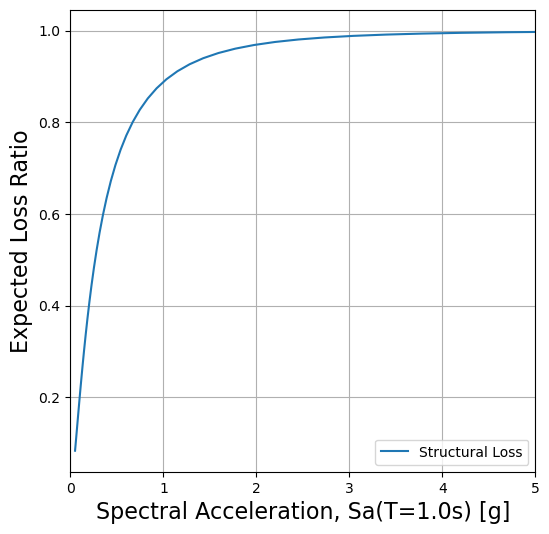

In [25]:
# Define consequence model to relate structural damage to a decision variable (i.e., expected loss ratio) 
consequence_model = [0.05, 0.20, 0.60, 1.00] # damage-to-loss ratios

# To derive the vulnerability, the consequence model needs to convolved with the fragility functions. 
# To do so, we can use the "get_vulnerability_function" method from the "postprocessor" class.

structural_loss = pp.get_vulnerability_function(cloud_dict['poes'],
                                                consequence_model)

# Plot the vulnerability function to visualise
plt.plot(cloud_dict['intensities'], structural_loss, label = 'Structural Loss')
plt.xlabel('Spectral Acceleration, Sa(T=1.0s) [g]', fontsize= FONTSIZE_1)
plt.ylabel('Expected Loss Ratio', fontsize = FONTSIZE_1)
plt.legend(loc = 'lower right')
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
plt.xlim([0.00, 5.00])
plt.show()
